In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("./data/weater_seoul_200212_20190727.csv", encoding='euc-kr')
lotto = pd.read_csv("./data/lotto_869.csv", encoding='euc-kr')

In [3]:
weather.head()

,지점,일시,평균기온,최저기온,최고기온,평균 풍속,평균 상대습도,평균 현지기압,합계 일조 시간,평균 전운량,평균 지면온도
0,108,2002-12-01,4.8,-0.7,9.9,1.2,60.1,1012.5,4.6,2.9,1.7
1,108,2002-12-02,6.9,3.3,12.1,1.3,63.6,1015.7,3.7,2.0,3.1
2,108,2002-12-03,7.7,2.8,11.0,2.0,52.4,1011.6,0.3,7.1,2.8
3,108,2002-12-04,11.3,8.0,15.9,1.8,50.4,1005.5,5.2,4.9,7.0
4,108,2002-12-05,7.3,4.2,10.5,2.7,67.9,1010.4,0.0,8.1,6.2


In [4]:
lotto.head()

,회차,추첨일,1등수,1등금액,2등수,2등금액,3등수,3등금액,4등수,4등금액,5등수,5등금액,No_1,No_2,No_3,No_4,No_5,No_6,No_Bonus
0,869,2019-07-27,10,1922582588,56,57219720,2210,1449912,108562,50000,1814332,5000,2,6,20,27,37,39,4
1,868,2019-07-20,6,3233804250,61,53013185,2152,1502698,109133,50000,1789491,5000,12,17,28,41,43,44,25
2,867,2019-07-13,5,3933755250,57,57511042,2175,1507186,109516,50000,1820552,5000,14,17,19,22,24,40,41
3,866,2019-07-06,9,2240409000,68,49420787,2035,1651408,104919,50000,1770017,5000,9,15,29,34,37,39,12
4,865,2019-06-29,13,1551729145,52,64655382,2076,1619499,104626,50000,1749234,5000,3,15,22,32,33,45,2


In [5]:
#임포트

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
# 추첨일을 인덱스로 !!!
lotto = lotto.set_index('추첨일')

In [7]:
# 필요한 컬럼만 추출!! (회차, 추첨번호 6개)

lotto = lotto[['회차','No_1', 'No_2', 'No_3', 'No_4', 'No_5', 'No_6', 'No_Bonus']]

lotto.head()

,회차,No_1,No_2,No_3,No_4,No_5,No_6,No_Bonus
추첨일,,,,,,,,
2019-07-27,869,2,6,20,27,37,39,4
2019-07-20,868,12,17,28,41,43,44,25
2019-07-13,867,14,17,19,22,24,40,41
2019-07-06,866,9,15,29,34,37,39,12
2019-06-29,865,3,15,22,32,33,45,2


In [8]:
weather = weather.set_index('일시')
weather.head()

,지점,평균기온,최저기온,최고기온,평균 풍속,평균 상대습도,평균 현지기압,합계 일조 시간,평균 전운량,평균 지면온도
일시,,,,,,,,,,
2002-12-01,108,4.8,-0.7,9.9,1.2,60.1,1012.5,4.6,2.9,1.7
2002-12-02,108,6.9,3.3,12.1,1.3,63.6,1015.7,3.7,2.0,3.1
2002-12-03,108,7.7,2.8,11.0,2.0,52.4,1011.6,0.3,7.1,2.8
2002-12-04,108,11.3,8.0,15.9,1.8,50.4,1005.5,5.2,4.9,7.0
2002-12-05,108,7.3,4.2,10.5,2.7,67.9,1010.4,0.0,8.1,6.2


In [9]:
df = pd.concat([lotto, weather], axis=1, join='inner')
df.index.names= ['일시']
df.head()

,회차,No_1,No_2,No_3,No_4,No_5,No_6,No_Bonus,지점,평균기온,최저기온,최고기온,평균 풍속,평균 상대습도,평균 현지기압,합계 일조 시간,평균 전운량,평균 지면온도
일시,,,,,,,,,,,,,,,,,,
2019-07-27,869,2,6,20,27,37,39,4,108,28.4,24.9,33.4,1.3,76.6,995.7,4.7,7.6,29.6
2019-07-20,868,12,17,28,41,43,44,25,108,28.0,25.1,31.9,2.1,66.9,990.8,1.2,9.5,28.4
2019-07-13,867,14,17,19,22,24,40,41,108,24.9,22.1,29.7,1.7,67.3,992.0,4.1,6.4,28.3
2019-07-06,866,9,15,29,34,37,39,12,108,29.7,24.6,36.1,1.7,40.9,994.1,11.8,3.4,37.1
2019-06-29,865,3,15,22,32,33,45,2,108,23.1,19.6,27.7,1.2,72.0,988.3,4.1,8.1,24.4


In [10]:
df.shape

(869, 18)

In [11]:
df.drop(['회차','지점','최저기온','최고기온','평균 풍속','합계 일조 시간', '평균 전운량', '평균 지면온도'], axis="columns", inplace=True)

df.head()

,No_1,No_2,No_3,No_4,No_5,No_6,No_Bonus,평균기온,평균 상대습도,평균 현지기압
일시,,,,,,,,,,
2019-07-27,2,6,20,27,37,39,4,28.4,76.6,995.7
2019-07-20,12,17,28,41,43,44,25,28.0,66.9,990.8
2019-07-13,14,17,19,22,24,40,41,24.9,67.3,992.0
2019-07-06,9,15,29,34,37,39,12,29.7,40.9,994.1
2019-06-29,3,15,22,32,33,45,2,23.1,72.0,988.3


라벨 추가해서 1로 입력 ( 1등 데이터 )

In [12]:
df['등수'] = 1
df.head()

,No_1,No_2,No_3,No_4,No_5,No_6,No_Bonus,평균기온,평균 상대습도,평균 현지기압,등수
일시,,,,,,,,,,,
2019-07-27,2,6,20,27,37,39,4,28.4,76.6,995.7,1
2019-07-20,12,17,28,41,43,44,25,28.0,66.9,990.8,1
2019-07-13,14,17,19,22,24,40,41,24.9,67.3,992.0,1
2019-07-06,9,15,29,34,37,39,12,29.7,40.9,994.1,1
2019-06-29,3,15,22,32,33,45,2,23.1,72.0,988.3,1


2등 데이터를 추가하고 라벨 저장

In [15]:
# 데이터를 복사!!
df2 = df.copy()

# 6개의 당첨 번호를 각각 보너스 번호로 변경
# 869개 데이터를 반복
for i in range(len(df)) :
    
    # 각 회차 데이터 당첨번호에 대해 반복(보너스 번호로 바꿈)
    for j in range(6) : 
        df3 = df.iloc[[i],:]
        # 869개 데이터에서 한 회차 데이터만 불러온다.
        df3.iloc[:,j] = df3.loc[:,'No_Bonus']
        
        # 등수 2등 저장
        df3.loc[:,'등수'] = 2
        
        #새로운 당첨 번호 2등 데이터 행을 추가 
        df2 = pd.concat([df3, df2])

C:\Users\SMT002\anaconda3\envs\deep01\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\SMT002\anaconda3\envs\deep01\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [16]:
df2

,No_1,No_2,No_3,No_4,No_5,No_6,No_Bonus,평균기온,평균 상대습도,평균 현지기압,등수
일시,,,,,,,,,,,
2002-12-07,10,23,29,33,37,16,16,5.2,63.9,1014.5,2
2002-12-07,10,23,29,33,16,40,16,5.2,63.9,1014.5,2
2002-12-07,10,23,29,16,37,40,16,5.2,63.9,1014.5,2
2002-12-07,10,23,16,33,37,40,16,5.2,63.9,1014.5,2
2002-12-07,10,16,29,33,37,40,16,5.2,63.9,1014.5,2
...,...,...,...,...,...,...,...,...,...,...,...
2003-01-04,16,24,29,40,41,42,3,-10.2,60.5,1012.3,1
2002-12-28,14,27,30,31,40,42,2,-0.9,64.8,1012.0,1
2002-12-21,11,16,19,21,27,31,30,6.5,55.4,1015.0,1


In [17]:
# 데이터 저장
df2.to_csv('./data/df2.csv')

In [ ]:
# 3등, 4등, 5등을 만들자

In [18]:
df2.shape

(6083, 11)

In [ ]:
df2.drop(['No_Bonus'] , axis = 'columns', inplace = True)

In [21]:
df2.head()

,No_1,No_2,No_3,No_4,No_5,No_6,평균기온,평균 상대습도,평균 현지기압,등수
일시,,,,,,,,,,
2002-12-07,10,23,29,33,37,16,5.2,63.9,1014.5,2
2002-12-07,10,23,29,33,16,40,5.2,63.9,1014.5,2
2002-12-07,10,23,29,16,37,40,5.2,63.9,1014.5,2
2002-12-07,10,23,16,33,37,40,5.2,63.9,1014.5,2
2002-12-07,10,16,29,33,37,40,5.2,63.9,1014.5,2


데이터 분리

In [39]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

X.shape, y.shape

((6083, 9), (6083,))

In [40]:
y = pd.get_dummies(y)

훈련데이터, 테스트 데이터 분리

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 77)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4562, 9), (1521, 9), (4562, 2), (1521, 2))

학습

In [94]:
np.random.seed(0)
tensorflow.random.set_seed(0)

In [102]:
model = Sequential()
model.add(Dense(128 ,input_dim =  X_train.shape[1], activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_73 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_75 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 34        
Total params: 12,178
Trainable params: 12,178
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [104]:
hist = model.fit(X_train,y_train, epochs= 100, batch_size = 50, 
           validation_split = 0.2)

Train on 3649 samples, validate on 913 samples
Epoch 1/100
3649/3649 [==============================] - 1s 144us/sample - loss: 3.0142 - accuracy: 0.8254 - val_loss: 0.4195 - val_accuracy: 0.8642
Epoch 2/100
3649/3649 [==============================] - 0s 45us/sample - loss: 0.4357 - accuracy: 0.8465 - val_loss: 0.3874 - val_accuracy: 0.8642
Epoch 3/100
3649/3649 [==============================] - 0s 41us/sample - loss: 0.4321 - accuracy: 0.8465 - val_loss: 0.3882 - val_accuracy: 0.8642
Epoch 4/100
3649/3649 [==============================] - 0s 41us/sample - loss: 0.4345 - accuracy: 0.8465 - val_loss: 0.4058 - val_accuracy: 0.8642
Epoch 5/100
3649/3649 [==============================] - 0s 42us/sample - loss: 0.4316 - accuracy: 0.8465 - val_loss: 0.3823 - val_accuracy: 0.8642
Epoch 6/100
3649/3649 [==============================] - 0s 43us/sample - loss: 0.4609 - accuracy: 0.8375 - val_loss: 0.4468 - val_accuracy: 0.8642
Epoch 7/100
3649/3649 [==============================] - 0s 43us

Epoch 56/100
3649/3649 [==============================] - 0s 41us/sample - loss: 0.4034 - accuracy: 0.8465 - val_loss: 0.3806 - val_accuracy: 0.8642
Epoch 57/100
3649/3649 [==============================] - 0s 38us/sample - loss: 0.4078 - accuracy: 0.8465 - val_loss: 0.3803 - val_accuracy: 0.8642
Epoch 58/100
3649/3649 [==============================] - 0s 45us/sample - loss: 0.4090 - accuracy: 0.8465 - val_loss: 0.4117 - val_accuracy: 0.8642
Epoch 59/100
3649/3649 [==============================] - 0s 39us/sample - loss: 0.4082 - accuracy: 0.8463 - val_loss: 0.3688 - val_accuracy: 0.8642
Epoch 60/100
3649/3649 [==============================] - 0s 43us/sample - loss: 0.4013 - accuracy: 0.8465 - val_loss: 0.3712 - val_accuracy: 0.8642
Epoch 61/100
3649/3649 [==============================] - 0s 43us/sample - loss: 0.4064 - accuracy: 0.8465 - val_loss: 0.3761 - val_accuracy: 0.8642
Epoch 62/100
3649/3649 [==============================] - 0s 47us/sample - loss: 0.4198 - accuracy: 0.8446

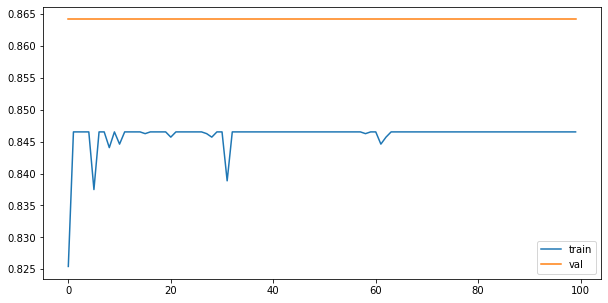

In [105]:
plt.figure(figsize=(10,5)) #가로,세로
plt.plot(hist.history['accuracy'], label = 'train') # 훈련용 데이터로 평가한 점수
plt.plot(hist.history['val_accuracy'], label= 'val') # 검증용 데이터로 평가한 점수
plt.legend()
plt.show()

In [85]:
# 모델 평가
print("훈련 스코어", model.evaluate(X_train, y_train))
print("테스트 스코어", model.evaluate(X_test, y_test))

4562/4562 [==============================] - 0s 42us/sample - loss: 0.4061 - accuracy: 0.8597
훈련 스코어 [0.40607056096163513, 0.85971063]
1521/1521 [==============================] - 0s 41us/sample - loss: 0.4234 - accuracy: 0.8494
테스트 스코어 [0.42339071351238805, 0.8494412]


In [48]:
pred = model.predict(X_test)

In [50]:
y_test

,1,2
일시,,
2019-02-02,0,1
2019-05-18,0,1
2011-10-01,0,1
2007-04-07,0,1
2009-03-07,0,1
...,...,...
2017-06-17,0,1
2011-12-10,0,1
2004-08-28,0,1


In [49]:
pred

array([[0.08696553, 0.879981  ],
       [0.09575118, 0.8540636 ],
       [0.07426796, 0.8893505 ],
       ...,
       [0.1333969 , 0.81360006],
       [0.12777738, 0.83775187],
       [0.10966902, 0.83312815]], dtype=float32)

In [106]:
# 예측
lottodata = np.array([1,2,3,4,5,6, 18., 25., 1024.]).reshape(1,9)

pre = model.predict(lottodata)
pre

array([[0.00629708, 0.99370295]], dtype=float32)

In [122]:
lottodata = np.array([16, 22, 21, 31, 33, 26 , 18., 25., 1024.]).reshape(1,9)

pre = model.predict(lottodata)
pre

array([[0.04392322, 0.95607674]], dtype=float32)